In [ ]:
import sqlite3
import pandas as pd

In [ ]:
conn = sqlite3.connect('/content/lab5_new.db')

In [ ]:
cursor = conn.cursor()

cursor.execute("SELECT * FROM products")

rows = cursor.fetchall()
conn.close()

pd.DataFrame(rows, columns=['product_id', 'product_name', 'manufacturer_id', 'category_id', 'product_price']).set_index('product_id')

,product_name,manufacturer_id,category_id,product_price
product_id,,,,
1,Ноутбук Lenovo ThinkPad X270 [X270 20HN0012RT],530,2,89709.4
2,Материнская плата MSI B250M BAZOOKA PLUS,325,2,5137.0
3,Электрочайник Oursson \t EK1763M,885,1,1089.0
4,Фен Sinbo SHD-7034,250,1,633.6
5,Ноутбук HP 250 G6 [250G6 1WY51EA],105,2,27682.6
6,Ноутбук HP 15-bs000 [15-BS019UR 1ZJ85EA],105,2,48389.0
7,Видеокарта Gigabyte GeForce GTX 1050 GV-N1050W...,932,2,11053.9
8,Массажер для тела GEZAtone AMG114,331,1,1529.0
9,Ноутбук Dell Inspiron 15 5570 [5570-0054],763,2,35970.0


In [ ]:
conn = sqlite3.connect('lab5_new.db')
pd.read_sql_query("""SELECT*
                    FROM purchases
                    WHERE customer_id=5""", conn)

,purchase_id,customer_id,store_id,purchase_date
0,3,5,1,1615190478
1,4,5,2,1612071477
2,6,5,2,1613856704
3,8,5,1,1609779480
4,18,5,2,1610912256
5,19,5,2,1611314618
6,30,5,1,1613755999
7,36,5,1,1618937694
8,37,5,1,1611822454
9,41,5,3,1614450002


In [ ]:
df = pd.read_sql_query("""SELECT customers.customer_id AS "Код покупателя", customer_name AS "ФИО клиента", COUNT(store_id) AS "Кол-во покупок"
                    FROM purchases
                    INNER JOIN customers ON customers.customer_id = purchases.customer_id
                    GROUP BY customers.customer_id, customer_name""", conn)
df

,Код покупателя,ФИО клиента,Кол-во покупок
0,1,Елена Кузьминична Елисеева,11
1,2,Галкина Жанна Геннадьевна,9
2,3,Мухина Зоя Валентиновна,7
3,4,Мишина Евдокия Ниловна,11
4,5,Олег Иванович Большаков,12


In [ ]:
import seaborn as sns
import matplotlib.pylab as plt

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Елена Кузьминична Елисеева'),
  Text(1, 0, 'Галкина Жанна Геннадьевна'),
  Text(2, 0, 'Мухина Зоя Валентиновна'),
  Text(3, 0, 'Мишина Евдокия Ниловна'),
  Text(4, 0, 'Олег Иванович Большаков')])

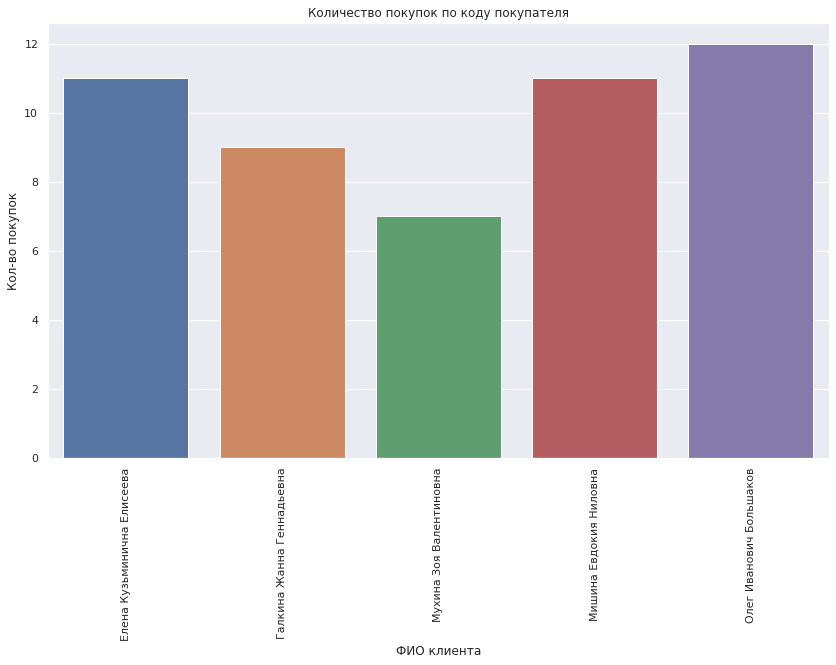

In [ ]:
sns.set(rc={'figure.figsize':(14,8)})
ax = sns.barplot(x='ФИО клиента', y='Кол-во покупок', data=df)
ax.set(xlabel='ФИО клиента', ylabel='Кол-во покупок',
       title='Количество покупок по коду покупателя')
plt.xticks(rotation=90)

In [ ]:
import plotly.express as px

px.bar(df, x='ФИО клиента', y='Кол-во покупок', color='ФИО клиента')

In [ ]:
df = pd.read_sql_query("""SELECT customer_name AS "ФИО клиента", COUNT(store_id) AS "Кол-во покупок"
                    FROM purchases
                    INNER JOIN customers ON customers.customer_id = purchases.customer_id
                    GROUP BY customer_name
                    ORDER BY COUNT(store_id)""", conn)
df

,ФИО клиента,Кол-во покупок
0,Мухина Зоя Валентиновна,7
1,Галкина Жанна Геннадьевна,9
2,Елена Кузьминична Елисеева,11
3,Мишина Евдокия Ниловна,11
4,Олег Иванович Большаков,12


In [ ]:
df = pd.read_sql_query("""SELECT customer_name AS "ФИО клиента", COUNT(store_id) AS "Кол-во покупок"
                    FROM purchases
                    INNER JOIN customers ON customers.customer_id = purchases.customer_id
                    GROUP BY customer_name
                    ORDER BY COUNT(store_id)
                    LIMIT 1""", conn)
df

,ФИО клиента,Кол-во покупок
0,Мухина Зоя Валентиновна,7


In [ ]:
pd.read_sql_query("""SELECT *
                    FROM products
                    LIMIT 5""", conn)

,product_id,product_name,manufacturer_id,category_id,product_price
0,1,Ноутбук Lenovo ThinkPad X270 [X270 20HN0012RT],530,2,89709.4
1,2,Материнская плата MSI B250M BAZOOKA PLUS,325,2,5137.0
2,3,Электрочайник Oursson \t EK1763M,885,1,1089.0
3,4,Фен Sinbo SHD-7034,250,1,633.6
4,5,Ноутбук HP 250 G6 [250G6 1WY51EA],105,2,27682.6


In [ ]:
cursor = conn.cursor()

sql  = "INSERT INTO products VALUES (51, 'Ноутбук HUAWEI MATE BOOK  4554854544', 530, 2, 460000.0)"
cursor.execute(sql)
conn.commit()

In [ ]:
pd.read_sql_query("""SELECT *
                    FROM products""", conn)

,product_id,product_name,manufacturer_id,category_id,product_price
0,1,Ноутбук Lenovo ThinkPad X270 [X270 20HN0012RT],530,2,89709.4
1,2,Материнская плата MSI B250M BAZOOKA PLUS,325,2,5137.0
2,3,Электрочайник Oursson \t EK1763M,885,1,1089.0
3,4,Фен Sinbo SHD-7034,250,1,633.6
4,5,Ноутбук HP 250 G6 [250G6 1WY51EA],105,2,27682.6
5,6,Ноутбук HP 15-bs000 [15-BS019UR 1ZJ85EA],105,2,48389.0
6,7,Видеокарта Gigabyte GeForce GTX 1050 GV-N1050W...,932,2,11053.9
7,8,Массажер для тела GEZAtone AMG114,331,1,1529.0
8,9,Ноутбук Dell Inspiron 15 5570 [5570-0054],763,2,35970.0
9,10,Ноутбук Dell Latitude 3480 [3480-6126],763,2,50444.9


In [ ]:
sql  = "DELETE FROM products WHERE product_id=51"
cursor.execute(sql)
conn.commit()

In [ ]:
pd.read_sql_query("""SELECT *
                    FROM products""", conn)

,product_id,product_name,manufacturer_id,category_id,product_price
0,1,Ноутбук Lenovo ThinkPad X270 [X270 20HN0012RT],530,2,89709.4
1,2,Материнская плата MSI B250M BAZOOKA PLUS,325,2,5137.0
2,3,Электрочайник Oursson \t EK1763M,885,1,1089.0
3,4,Фен Sinbo SHD-7034,250,1,633.6
4,5,Ноутбук HP 250 G6 [250G6 1WY51EA],105,2,27682.6
5,6,Ноутбук HP 15-bs000 [15-BS019UR 1ZJ85EA],105,2,48389.0
6,7,Видеокарта Gigabyte GeForce GTX 1050 GV-N1050W...,932,2,11053.9
7,8,Массажер для тела GEZAtone AMG114,331,1,1529.0
8,9,Ноутбук Dell Inspiron 15 5570 [5570-0054],763,2,35970.0
9,10,Ноутбук Dell Latitude 3480 [3480-6126],763,2,50444.9
